In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
data=pd.read_csv("titanic-passengers.csv", sep=';')

data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})
data["Sex"]=data["Sex"].map({"male" : 0, "female" : 1})

data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'], axis=1, inplace=True)
data['Family_members'] = data['Parch'] + data ['SibSp']
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data["Age"].fillna(data["Age"].mean(), axis=0, inplace= True)
data

,Survived,Pclass,Sex,Age,Family_members
0,0,2,0,28.000000,0
1,0,3,0,25.000000,0
2,0,3,0,20.000000,0
3,0,3,1,29.000000,4
4,0,1,0,31.000000,1
...,...,...,...,...,...
886,1,2,1,14.000000,1
887,0,3,0,22.000000,0
888,0,3,1,30.000000,0
889,0,3,0,29.699118,0


In [4]:
data.groupby('Survived').mean()

,Pclass,Sex,Age,Family_members
Survived,,,,
0,2.531876,0.147541,30.415100,0.883424
1,1.950292,0.681287,28.549778,0.938596


In [5]:
data.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
Family_members    0
dtype: int64

In [6]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Family_members'], dtype='object')

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
X=data[['Sex','Age','Family_members','Pclass']]
Y=data.Survived
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [9]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.776536312849162
f1_score :  0.7333333333333334
precision_score :  0.7857142857142857


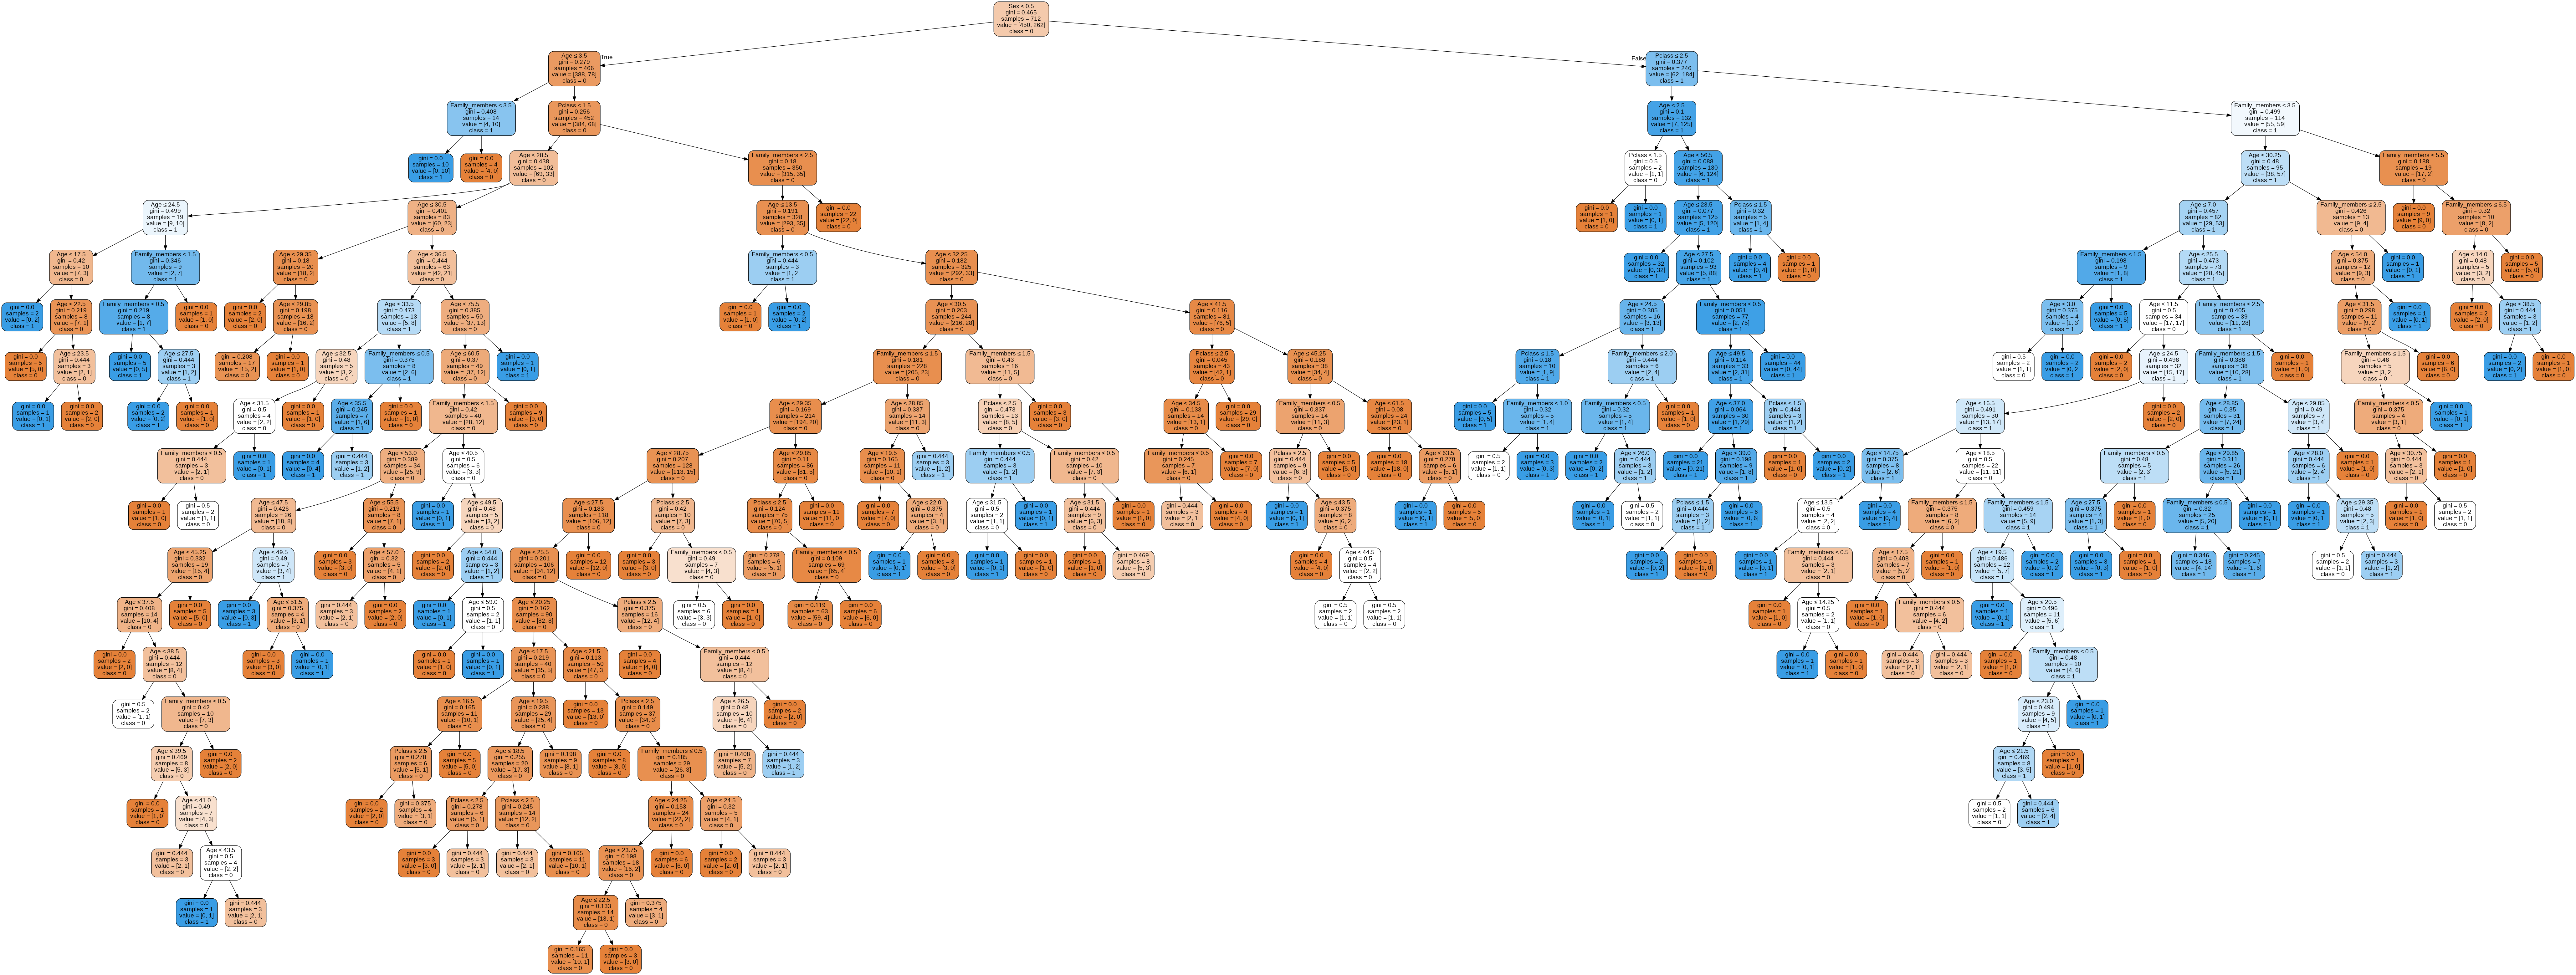

In [10]:
#Tree Plot 
dot_data = StringIO()
feature_cols = ['Sex' ,'Age','Family_members','Pclass']
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

In [11]:
#Decision Tree with different parameters 
model = DecisionTreeClassifier(criterion="entropy", splitter="random")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.7877094972067039
f1_score :  0.7432432432432432
precision_score :  0.8088235294117647


In [12]:
#Random Forest 
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.7932960893854749
f1_score :  0.7549668874172185
precision_score :  0.8028169014084507


In [13]:
#Random Forest with different number of estimators 
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.7932960893854749
f1_score :  0.7549668874172185
precision_score :  0.8028169014084507
